In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = """
Epoch 81: early stopping
latent dim: 1 loss value is:  0.43264853954315186
Epoch 83: early stopping
latent dim: 1 loss value is:  0.4246210753917694
Epoch 138: early stopping
latent dim: 1 loss value is:  0.39358094334602356
Epoch 115: early stopping
latent dim: 2 loss value is:  0.19551512598991394
Epoch 127: early stopping
latent dim: 2 loss value is:  0.17096658051013947
Epoch 206: early stopping
latent dim: 2 loss value is:  0.14624392986297607
Epoch 71: early stopping
latent dim: 3 loss value is:  0.17050284147262573
Epoch 88: early stopping
latent dim: 3 loss value is:  0.19815686345100403
Epoch 108: early stopping
latent dim: 3 loss value is:  0.13792955875396729
Epoch 96: early stopping
latent dim: 4 loss value is:  0.14251235127449036
Epoch 172: early stopping
latent dim: 4 loss value is:  0.14061188697814941
Epoch 232: early stopping
latent dim: 4 loss value is:  0.11480768769979477
Epoch 59: early stopping
latent dim: 5 loss value is:  0.1773962527513504
Epoch 120: early stopping
latent dim: 5 loss value is:  0.15002083778381348
Epoch 126: early stopping
latent dim: 5 loss value is:  0.135896235704422
Epoch 70: early stopping
latent dim: 6 loss value is:  0.1796477884054184
Epoch 74: early stopping
latent dim: 6 loss value is:  0.15678399801254272
Epoch 113: early stopping
latent dim: 6 loss value is:  0.136429563164711
Epoch 119: early stopping
latent dim: 7 loss value is:  0.14421308040618896
Epoch 140: early stopping
latent dim: 7 loss value is:  0.11908379197120667
Epoch 159: early stopping
latent dim: 7 loss value is:  0.1216021403670311
Epoch 65: early stopping
latent dim: 8 loss value is:  0.1791866421699524
Epoch 83: early stopping
latent dim: 8 loss value is:  0.13849690556526184
Epoch 93: early stopping
latent dim: 8 loss value is:  0.14074109494686127
Epoch 110: early stopping
latent dim: 9 loss value is:  0.13788047432899475
Epoch 160: early stopping
latent dim: 9 loss value is:  0.12524810433387756
Epoch 197: early stopping
latent dim: 9 loss value is:  0.11548702418804169
Epoch 62: early stopping
latent dim: 10 loss value is:  0.1437688171863556
Epoch 83: early stopping
latent dim: 10 loss value is:  0.1330782175064087
Epoch 203: early stopping
latent dim: 10 loss value is:  0.10924623161554337
Epoch 115: early stopping
latent dim: 11 loss value is:  0.1171903908252716
Epoch 127: early stopping
latent dim: 11 loss value is:  0.137893944978714
Epoch 128: early stopping
latent dim: 11 loss value is:  0.13153992593288422
Epoch 105: early stopping
latent dim: 12 loss value is:  0.13547176122665405
Epoch 106: early stopping
latent dim: 12 loss value is:  0.13755448162555695
Epoch 153: early stopping
latent dim: 12 loss value is:  0.1310296207666397
Epoch 112: early stopping
latent dim: 13 loss value is:  0.13105785846710205
Epoch 115: early stopping
latent dim: 13 loss value is:  0.11372571438550949
Epoch 123: early stopping
latent dim: 13 loss value is:  0.1111784428358078
Epoch 115: early stopping
latent dim: 14 loss value is:  0.1199534684419632
Epoch 153: early stopping
latent dim: 14 loss value is:  0.1016126200556755
Epoch 173: early stopping
latent dim: 14 loss value is:  0.10058610141277313
Epoch 81: early stopping
latent dim: 15 loss value is:  0.1584518402814865
Epoch 95: early stopping
latent dim: 15 loss value is:  0.1420411616563797
Epoch 193: early stopping
latent dim: 15 loss value is:  0.12052177637815475
Epoch 85: early stopping
latent dim: 16 loss value is:  0.1528358906507492
Epoch 136: early stopping
latent dim: 16 loss value is:  0.11436772346496582
Epoch 145: early stopping
latent dim: 16 loss value is:  0.1142214983701706
Epoch 62: early stopping
latent dim: 17 loss value is:  0.1398986130952835
Epoch 72: early stopping
latent dim: 17 loss value is:  0.15443716943264008
Epoch 104: early stopping
latent dim: 17 loss value is:  0.10328815132379532
Epoch 107: early stopping
latent dim: 18 loss value is:  0.11969833821058273
Epoch 129: early stopping
latent dim: 18 loss value is:  0.11593528091907501
Epoch 140: early stopping
latent dim: 18 loss value is:  0.11460230499505997
Epoch 102: early stopping
latent dim: 19 loss value is:  0.1278652399778366
Epoch 120: early stopping
latent dim: 19 loss value is:  0.1259659379720688
Epoch 143: early stopping
latent dim: 19 loss value is:  0.09277579933404922
Epoch 76: early stopping
latent dim: 20 loss value is:  0.11765464395284653
Epoch 99: early stopping
latent dim: 20 loss value is:  0.1285422146320343
Epoch 167: early stopping
latent dim: 20 loss value is:  0.11905531585216522
Epoch 89: early stopping
latent dim: 21 loss value is:  0.12639546394348145
Epoch 89: early stopping
latent dim: 21 loss value is:  0.13645020127296448
Epoch 220: early stopping
latent dim: 21 loss value is:  0.1047007292509079
Epoch 79: early stopping
latent dim: 22 loss value is:  0.11534976214170456
Epoch 90: early stopping
latent dim: 22 loss value is:  0.12249614298343658
Epoch 114: early stopping
latent dim: 22 loss value is:  0.12241613864898682
Epoch 107: early stopping
latent dim: 23 loss value is:  0.11081938445568085
Epoch 115: early stopping
latent dim: 23 loss value is:  0.12087065726518631
Epoch 119: early stopping
latent dim: 23 loss value is:  0.10872547328472137
Epoch 90: early stopping
latent dim: 24 loss value is:  0.1148584857583046
Epoch 122: early stopping
latent dim: 24 loss value is:  0.11886892467737198
Epoch 179: early stopping
latent dim: 24 loss value is:  0.10061457008123398
Epoch 97: early stopping
latent dim: 25 loss value is:  0.1543140858411789
Epoch 150: early stopping
latent dim: 25 loss value is:  0.10404431074857712
Epoch 159: early stopping
latent dim: 25 loss value is:  0.12321409583091736
Epoch 71: early stopping
latent dim: 26 loss value is:  0.13007473945617676
Epoch 146: early stopping
latent dim: 26 loss value is:  0.09655096381902695
Epoch 219: early stopping
latent dim: 26 loss value is:  0.10555078834295273
Epoch 110: early stopping
latent dim: 27 loss value is:  0.12208912521600723
Epoch 127: early stopping
latent dim: 27 loss value is:  0.11902198195457458
Epoch 164: early stopping
latent dim: 27 loss value is:  0.10958321392536163
Epoch 95: early stopping
latent dim: 28 loss value is:  0.11745449155569077
Epoch 110: early stopping
latent dim: 28 loss value is:  0.13369187712669373
Epoch 110: early stopping
latent dim: 28 loss value is:  0.11351042985916138
Epoch 54: early stopping
latent dim: 29 loss value is:  0.14129085838794708
Epoch 101: early stopping
latent dim: 29 loss value is:  0.1211857721209526
Epoch 181: early stopping
latent dim: 29 loss value is:  0.12393681704998016
Epoch 92: early stopping
latent dim: 30 loss value is:  0.1057053729891777
Epoch 96: early stopping
latent dim: 30 loss value is:  0.1132756695151329
Epoch 133: early stopping
latent dim: 30 loss value is:  0.10897615551948547
Epoch 94: early stopping
latent dim: 31 loss value is:  0.1297752410173416
Epoch 158: early stopping
latent dim: 31 loss value is:  0.10925968736410141
Epoch 223: early stopping
latent dim: 31 loss value is:  0.10807663947343826
Epoch 69: early stopping
latent dim: 32 loss value is:  0.12144603580236435
Epoch 95: early stopping
latent dim: 32 loss value is:  0.10616718232631683
Epoch 96: early stopping
latent dim: 32 loss value is:  0.13198010623455048
Epoch 57: early stopping
latent dim: 33 loss value is:  0.12451744079589844
Epoch 89: early stopping
latent dim: 33 loss value is:  0.11727114766836166
Epoch 151: early stopping
latent dim: 33 loss value is:  0.10504379123449326
Epoch 92: early stopping
latent dim: 34 loss value is:  0.10877914726734161
Epoch 131: early stopping
latent dim: 34 loss value is:  0.11912714689970016
Epoch 205: early stopping
latent dim: 34 loss value is:  0.10921023786067963
Epoch 84: early stopping
latent dim: 35 loss value is:  0.1137448400259018
Epoch 138: early stopping
latent dim: 35 loss value is:  0.10878884792327881
Epoch 144: early stopping
latent dim: 35 loss value is:  0.11059500277042389
Epoch 86: early stopping
latent dim: 36 loss value is:  0.1265694499015808
Epoch 127: early stopping
latent dim: 36 loss value is:  0.11626598984003067
Epoch 148: early stopping
latent dim: 36 loss value is:  0.09772337973117828
Epoch 61: early stopping
latent dim: 37 loss value is:  0.1404990255832672
Epoch 69: early stopping
latent dim: 37 loss value is:  0.1257144659757614
Epoch 116: early stopping
latent dim: 37 loss value is:  0.11773968487977982
Epoch 102: early stopping
latent dim: 38 loss value is:  0.1337556093931198
Epoch 102: early stopping
latent dim: 38 loss value is:  0.10001888126134872
Epoch 168: early stopping
latent dim: 38 loss value is:  0.10379929095506668
Epoch 102: early stopping
latent dim: 39 loss value is:  0.126679927110672
Epoch 149: early stopping
latent dim: 39 loss value is:  0.11183086037635803
Epoch 193: early stopping
latent dim: 39 loss value is:  0.10460556298494339
Epoch 125: early stopping
latent dim: 40 loss value is:  0.11495465785264969
Epoch 176: early stopping
latent dim: 40 loss value is:  0.10869137942790985
Epoch 239: early stopping
latent dim: 40 loss value is:  0.10285666584968567
Epoch 58: early stopping
latent dim: 41 loss value is:  0.1349107176065445
Epoch 102: early stopping
latent dim: 41 loss value is:  0.12134598940610886
Epoch 128: early stopping
latent dim: 41 loss value is:  0.1217745691537857
Epoch 61: early stopping
latent dim: 42 loss value is:  0.1454419493675232
Epoch 124: early stopping
latent dim: 42 loss value is:  0.1070067286491394
Epoch 160: early stopping
latent dim: 42 loss value is:  0.10819506645202637
Epoch 93: early stopping
latent dim: 43 loss value is:  0.09671420603990555
Epoch 102: early stopping
latent dim: 43 loss value is:  0.12330156564712524
Epoch 232: early stopping
latent dim: 43 loss value is:  0.09540117532014847
Epoch 67: early stopping
latent dim: 44 loss value is:  0.13094119727611542
Epoch 116: early stopping
latent dim: 44 loss value is:  0.11590553820133209
Epoch 120: early stopping
latent dim: 44 loss value is:  0.10713554173707962
Epoch 99: early stopping
latent dim: 45 loss value is:  0.12770511209964752
Epoch 129: early stopping
latent dim: 45 loss value is:  0.10234026610851288
Epoch 139: early stopping
latent dim: 45 loss value is:  0.12411709129810333
Epoch 84: early stopping
latent dim: 46 loss value is:  0.12941114604473114
Epoch 99: early stopping
latent dim: 46 loss value is:  0.10888216644525528
Epoch 132: early stopping
latent dim: 46 loss value is:  0.10658213496208191
Epoch 129: early stopping
latent dim: 47 loss value is:  0.11312323808670044
Epoch 169: early stopping
latent dim: 47 loss value is:  0.10301916301250458
Epoch 170: early stopping
latent dim: 47 loss value is:  0.11214754730463028
Epoch 87: early stopping
latent dim: 48 loss value is:  0.11969583481550217
Epoch 89: early stopping
latent dim: 48 loss value is:  0.11598849296569824
Epoch 130: early stopping
latent dim: 48 loss value is:  0.11993588507175446
Epoch 51: early stopping
latent dim: 49 loss value is:  0.1435956060886383
Epoch 97: early stopping
latent dim: 49 loss value is:  0.10891716927289963
Epoch 114: early stopping
latent dim: 49 loss value is:  0.10482384264469147
Epoch 63: early stopping
latent dim: 50 loss value is:  0.11973386257886887
Epoch 81: early stopping
latent dim: 50 loss value is:  0.11516280472278595
Epoch 90: early stopping
latent dim: 50 loss value is:  0.11811912804841995
Epoch 67: early stopping
latent dim: 51 loss value is:  0.13057196140289307
Epoch 104: early stopping
latent dim: 51 loss value is:  0.11643212288618088
Epoch 138: early stopping
latent dim: 51 loss value is:  0.1097860261797905
Epoch 76: early stopping
latent dim: 52 loss value is:  0.12827549874782562
Epoch 97: early stopping
latent dim: 52 loss value is:  0.11071206629276276
Epoch 125: early stopping
latent dim: 52 loss value is:  0.11824359744787216
Epoch 55: early stopping
latent dim: 53 loss value is:  0.146933451294899
Epoch 99: early stopping
latent dim: 53 loss value is:  0.12002255767583847
Epoch 133: early stopping
latent dim: 53 loss value is:  0.11415145546197891
Epoch 72: early stopping
latent dim: 54 loss value is:  0.1252492368221283
Epoch 100: early stopping
latent dim: 54 loss value is:  0.10882823169231415
Epoch 109: early stopping
latent dim: 54 loss value is:  0.11682694405317307
Epoch 68: early stopping
latent dim: 55 loss value is:  0.11844880133867264
Epoch 131: early stopping
latent dim: 55 loss value is:  0.11229687929153442
Epoch 161: early stopping
latent dim: 55 loss value is:  0.1014455035328865
Epoch 74: early stopping
latent dim: 56 loss value is:  0.11357676982879639
Epoch 82: early stopping
latent dim: 56 loss value is:  0.12576434016227722
Epoch 92: early stopping
latent dim: 56 loss value is:  0.1236799955368042
Epoch 82: early stopping
latent dim: 57 loss value is:  0.10443747043609619
Epoch 90: early stopping
latent dim: 57 loss value is:  0.11773083359003067
Epoch 93: early stopping
latent dim: 57 loss value is:  0.1310776323080063
Epoch 68: early stopping
latent dim: 58 loss value is:  0.13630476593971252
Epoch 91: early stopping
latent dim: 58 loss value is:  0.10894989222288132
Epoch 107: early stopping
latent dim: 58 loss value is:  0.11927986145019531
Epoch 83: early stopping
latent dim: 59 loss value is:  0.11787080764770508
Epoch 93: early stopping
latent dim: 59 loss value is:  0.11770705133676529
Epoch 97: early stopping
latent dim: 59 loss value is:  0.11412177979946136
Epoch 73: early stopping
latent dim: 60 loss value is:  0.13143986463546753
Epoch 92: early stopping
latent dim: 60 loss value is:  0.12055783718824387
Epoch 131: early stopping
latent dim: 60 loss value is:  0.10067004710435867
Epoch 65: early stopping
latent dim: 61 loss value is:  0.1242365837097168
Epoch 88: early stopping
latent dim: 61 loss value is:  0.13143999874591827
Epoch 97: early stopping
latent dim: 61 loss value is:  0.11934953927993774
Epoch 65: early stopping
latent dim: 62 loss value is:  0.11954104155302048
Epoch 97: early stopping
latent dim: 62 loss value is:  0.11619705706834793
Epoch 121: early stopping
latent dim: 62 loss value is:  0.11386418342590332
Epoch 76: early stopping
latent dim: 63 loss value is:  0.11283813416957855
Epoch 129: early stopping
latent dim: 63 loss value is:  0.11848144978284836
Epoch 142: early stopping
latent dim: 63 loss value is:  0.10731790959835052
Epoch 105: early stopping
latent dim: 64 loss value is:  0.11959200352430344
Epoch 112: early stopping
latent dim: 64 loss value is:  0.11321423202753067
Epoch 118: early stopping
latent dim: 64 loss value is:  0.12758824229240417
Epoch 71: early stopping
latent dim: 65 loss value is:  0.12000613659620285
Epoch 98: early stopping
latent dim: 65 loss value is:  0.11699333786964417
Epoch 107: early stopping
latent dim: 65 loss value is:  0.11505242437124252
Epoch 89: early stopping
latent dim: 66 loss value is:  0.11646834015846252
Epoch 106: early stopping
latent dim: 66 loss value is:  0.12874668836593628
Epoch 137: early stopping
latent dim: 66 loss value is:  0.11444944143295288
Epoch 84: early stopping
latent dim: 67 loss value is:  0.12315011769533157
Epoch 88: early stopping
latent dim: 67 loss value is:  0.11449027806520462
Epoch 116: early stopping
latent dim: 67 loss value is:  0.11274223774671555
Epoch 69: early stopping
latent dim: 68 loss value is:  0.12179866433143616
Epoch 117: early stopping
latent dim: 68 loss value is:  0.1159684807062149
Epoch 148: early stopping
latent dim: 68 loss value is:  0.10706397145986557
Epoch 85: early stopping
latent dim: 69 loss value is:  0.12376272678375244
Epoch 114: early stopping
latent dim: 69 loss value is:  0.11024515330791473
Epoch 157: early stopping
latent dim: 69 loss value is:  0.10741222649812698
Epoch 71: early stopping
latent dim: 70 loss value is:  0.12653525173664093
Epoch 116: early stopping
latent dim: 70 loss value is:  0.09676460921764374
Epoch 130: early stopping
latent dim: 70 loss value is:  0.1070656105875969
Epoch 73: early stopping
latent dim: 71 loss value is:  0.12199032306671143
Epoch 80: early stopping
latent dim: 71 loss value is:  0.11384134739637375
Epoch 151: early stopping
latent dim: 71 loss value is:  0.11092154681682587
Epoch 96: early stopping
latent dim: 72 loss value is:  0.12666267156600952
Epoch 103: early stopping
latent dim: 72 loss value is:  0.1141873151063919
Epoch 139: early stopping
latent dim: 72 loss value is:  0.10933076590299606
Epoch 62: early stopping
latent dim: 73 loss value is:  0.12976990640163422
Epoch 78: early stopping
latent dim: 73 loss value is:  0.1176915094256401
Epoch 128: early stopping
latent dim: 73 loss value is:  0.1262781322002411
Epoch 79: early stopping
latent dim: 74 loss value is:  0.1083635464310646
Epoch 104: early stopping
latent dim: 74 loss value is:  0.1160590872168541
Epoch 116: early stopping
latent dim: 74 loss value is:  0.10935055464506149
Epoch 95: early stopping
latent dim: 75 loss value is:  0.13811297714710236
Epoch 135: early stopping
latent dim: 75 loss value is:  0.10810309648513794
Epoch 142: early stopping
latent dim: 75 loss value is:  0.10381343960762024
Epoch 76: early stopping
latent dim: 76 loss value is:  0.12203659117221832
Epoch 85: early stopping
latent dim: 76 loss value is:  0.12089484184980392
Epoch 114: early stopping
latent dim: 76 loss value is:  0.1118769496679306
Epoch 77: early stopping
latent dim: 77 loss value is:  0.11349405348300934
Epoch 98: early stopping
latent dim: 77 loss value is:  0.11285369098186493
Epoch 114: early stopping
latent dim: 77 loss value is:  0.1106916293501854
Epoch 66: early stopping
latent dim: 78 loss value is:  0.11991920322179794
Epoch 84: early stopping
latent dim: 78 loss value is:  0.1063341274857521
Epoch 119: early stopping
latent dim: 78 loss value is:  0.10667210072278976
Epoch 68: early stopping
latent dim: 79 loss value is:  0.1193523183465004
Epoch 119: early stopping
latent dim: 79 loss value is:  0.1176382303237915
Epoch 130: early stopping
latent dim: 79 loss value is:  0.10106165707111359
Epoch 49: early stopping
latent dim: 80 loss value is:  0.14100287854671478
Epoch 78: early stopping
latent dim: 80 loss value is:  0.11416001617908478
Epoch 92: early stopping
latent dim: 80 loss value is:  0.10979356616735458
Epoch 105: early stopping
latent dim: 81 loss value is:  0.11729425936937332
Epoch 110: early stopping
latent dim: 81 loss value is:  0.11380615085363388
Epoch 129: early stopping
latent dim: 81 loss value is:  0.11968625336885452
Epoch 69: early stopping
latent dim: 82 loss value is:  0.12811917066574097
Epoch 121: early stopping
latent dim: 82 loss value is:  0.12447821348905563
Epoch 146: early stopping
latent dim: 82 loss value is:  0.11225423961877823
Epoch 60: early stopping
latent dim: 83 loss value is:  0.12436608225107193
Epoch 144: early stopping
latent dim: 83 loss value is:  0.11368266493082047
Epoch 183: early stopping
latent dim: 83 loss value is:  0.11637456715106964
Epoch 74: early stopping
latent dim: 84 loss value is:  0.13050426542758942
Epoch 101: early stopping
latent dim: 84 loss value is:  0.11098926514387131
Epoch 126: early stopping
latent dim: 84 loss value is:  0.11803384125232697
Epoch 104: early stopping
latent dim: 85 loss value is:  0.11420249938964844
Epoch 122: early stopping
latent dim: 85 loss value is:  0.10645727813243866
Epoch 178: early stopping
latent dim: 85 loss value is:  0.10919112712144852
Epoch 58: early stopping
latent dim: 86 loss value is:  0.13430920243263245
Epoch 61: early stopping
latent dim: 86 loss value is:  0.11242423951625824
Epoch 92: early stopping
latent dim: 86 loss value is:  0.11845523864030838
Epoch 53: early stopping
latent dim: 87 loss value is:  0.1364479511976242
Epoch 68: early stopping
latent dim: 87 loss value is:  0.1157916709780693
Epoch 105: early stopping
latent dim: 87 loss value is:  0.11269015073776245
Epoch 59: early stopping
latent dim: 88 loss value is:  0.13045215606689453
Epoch 66: early stopping
latent dim: 88 loss value is:  0.11919829994440079
Epoch 80: early stopping
latent dim: 88 loss value is:  0.11588327586650848
Epoch 57: early stopping
latent dim: 89 loss value is:  0.13559146225452423
Epoch 92: early stopping
latent dim: 89 loss value is:  0.09893187880516052
Epoch 128: early stopping
latent dim: 89 loss value is:  0.12289349734783173
Epoch 76: early stopping
latent dim: 90 loss value is:  0.12310206890106201
Epoch 86: early stopping
latent dim: 90 loss value is:  0.10869913548231125
Epoch 128: early stopping
latent dim: 90 loss value is:  0.1066010370850563
Epoch 59: early stopping
latent dim: 91 loss value is:  0.13163414597511292
Epoch 82: early stopping
latent dim: 91 loss value is:  0.11364734172821045
Epoch 100: early stopping
latent dim: 91 loss value is:  0.10683824867010117
Epoch 61: early stopping
latent dim: 92 loss value is:  0.11422276496887207
Epoch 83: early stopping
latent dim: 92 loss value is:  0.1222899854183197
Epoch 144: early stopping
latent dim: 92 loss value is:  0.10881364345550537
Epoch 71: early stopping
latent dim: 93 loss value is:  0.11245229095220566
Epoch 99: early stopping
latent dim: 93 loss value is:  0.1159953847527504
Epoch 125: early stopping
latent dim: 93 loss value is:  0.11002178490161896
Epoch 93: early stopping
latent dim: 94 loss value is:  0.09671281278133392
Epoch 99: early stopping
latent dim: 94 loss value is:  0.1179925724864006
Epoch 103: early stopping
latent dim: 94 loss value is:  0.12287556380033493
Epoch 81: early stopping
latent dim: 95 loss value is:  0.12452234327793121
Epoch 86: early stopping
latent dim: 95 loss value is:  0.10841377079486847
Epoch 91: early stopping
latent dim: 95 loss value is:  0.13339392840862274
Epoch 71: early stopping
latent dim: 96 loss value is:  0.10637068748474121
Epoch 73: early stopping
latent dim: 96 loss value is:  0.11336452513933182
Epoch 159: early stopping
latent dim: 96 loss value is:  0.1105513796210289
Epoch 81: early stopping
latent dim: 97 loss value is:  0.1200953796505928
Epoch 87: early stopping
latent dim: 97 loss value is:  0.11194264143705368
Epoch 102: early stopping
latent dim: 97 loss value is:  0.11931274086236954
Epoch 71: early stopping
latent dim: 98 loss value is:  0.126268669962883
Epoch 112: early stopping
latent dim: 98 loss value is:  0.1216583102941513
Epoch 153: early stopping
latent dim: 98 loss value is:  0.11363207548856735
Epoch 98: early stopping
latent dim: 99 loss value is:  0.11313172429800034
Epoch 114: early stopping
latent dim: 99 loss value is:  0.11934061348438263
Epoch 129: early stopping
latent dim: 99 loss value is:  0.11849632859230042
Epoch 58: early stopping
latent dim: 100 loss value is:  0.13001848757266998
Epoch 74: early stopping
latent dim: 100 loss value is:  0.11949066817760468
Epoch 81: early stopping
latent dim: 100 loss value is:  0.11316722631454468
Epoch 72: early stopping
latent dim: 101 loss value is:  0.11807555705308914
Epoch 78: early stopping
latent dim: 101 loss value is:  0.1236846074461937
Epoch 95: early stopping
latent dim: 101 loss value is:  0.11760130524635315
Epoch 63: early stopping
latent dim: 102 loss value is:  0.1431577056646347
Epoch 94: early stopping
latent dim: 102 loss value is:  0.11604005098342896
Epoch 109: early stopping
latent dim: 102 loss value is:  0.10338421911001205
Epoch 81: early stopping
latent dim: 103 loss value is:  0.12947171926498413
Epoch 92: early stopping
latent dim: 103 loss value is:  0.11456888914108276
Epoch 130: early stopping
latent dim: 103 loss value is:  0.12428747117519379
Epoch 78: early stopping
latent dim: 104 loss value is:  0.12334258109331131
Epoch 89: early stopping
latent dim: 104 loss value is:  0.11271065473556519
Epoch 98: early stopping
latent dim: 104 loss value is:  0.11005279421806335
Epoch 103: early stopping
latent dim: 105 loss value is:  0.11698869615793228
Epoch 122: early stopping
latent dim: 105 loss value is:  0.10932913422584534
Epoch 132: early stopping
latent dim: 105 loss value is:  0.10219059884548187
Epoch 92: early stopping
latent dim: 106 loss value is:  0.10593453049659729
Epoch 94: early stopping
latent dim: 106 loss value is:  0.11455710977315903
Epoch 120: early stopping
latent dim: 106 loss value is:  0.10813681781291962
Epoch 78: early stopping
latent dim: 107 loss value is:  0.1199454516172409
Epoch 88: early stopping
latent dim: 107 loss value is:  0.11403648555278778
Epoch 107: early stopping
latent dim: 107 loss value is:  0.1203678548336029
Epoch 64: early stopping
latent dim: 108 loss value is:  0.12668338418006897
Epoch 66: early stopping
latent dim: 108 loss value is:  0.1401599645614624
Epoch 79: early stopping
latent dim: 108 loss value is:  0.13436926901340485
Epoch 74: early stopping
latent dim: 109 loss value is:  0.1199360266327858
Epoch 121: early stopping
latent dim: 109 loss value is:  0.11461599171161652
Epoch 123: early stopping
latent dim: 109 loss value is:  0.12031913548707962
Epoch 88: early stopping
latent dim: 110 loss value is:  0.12163529545068741
Epoch 93: early stopping
latent dim: 110 loss value is:  0.11942688375711441
Epoch 122: early stopping
latent dim: 110 loss value is:  0.11946538090705872
Epoch 71: early stopping
latent dim: 111 loss value is:  0.10363342612981796
Epoch 86: early stopping
latent dim: 111 loss value is:  0.11973781883716583
Epoch 117: early stopping
latent dim: 111 loss value is:  0.11538927257061005
Epoch 64: early stopping
latent dim: 112 loss value is:  0.11186046898365021
Epoch 75: early stopping
latent dim: 112 loss value is:  0.10404875129461288
Epoch 116: early stopping
latent dim: 112 loss value is:  0.10915768146514893
Epoch 57: early stopping
latent dim: 113 loss value is:  0.1307140588760376
Epoch 78: early stopping
latent dim: 113 loss value is:  0.12294657528400421
Epoch 86: early stopping
latent dim: 113 loss value is:  0.11859433352947235
"""
data = data.split("\n")
res = {}
for line in data:
    temp = line.split(":")
    if len(temp) == 3:
        try:
            res[temp[1].strip().split(" ")[0]] = min(res[temp[1].strip().split(" ")[0]], float(temp[2].strip().split(" ")[0]))
        except:
            res[temp[1].strip().split(" ")[0]] = float(temp[2].strip().split(" ")[0])


<AxesSubplot: >

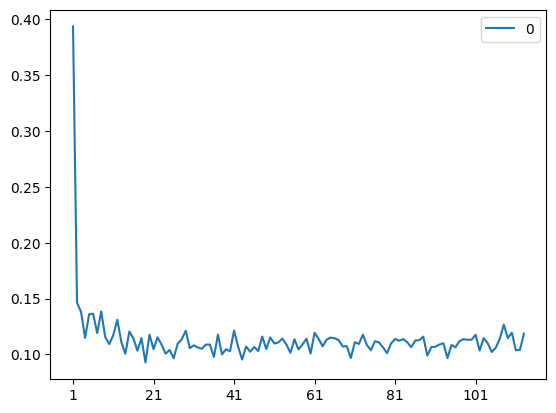

In [17]:
resdf = pd.DataFrame.from_dict(res, orient='index')
resdf.plot()

In [ ]:
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/admin")
BLE = myclient["BLE"]

def query(collection, filter:dict, addFrameColumn=True):
    df =  pd.DataFrame(list(collection.find(filter)))
    if addFrameColumn:
        df['frame'] = df.apply(lambda x: x['I'] + np.dot(x['Q'],1j), axis=1)
    return df.copy()

In [ ]:



# Reshape the data for training (1 sample of many timesteps)
y_train = y.reshape(1, -1)

# Build the autoencoder model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(y_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1]))  # Linear activation for reconstruction

model.compile(optimizer='adam', loss='mse')
model.fit(y_train, y_train, epochs=500, verbose=0)

# Predict (reconstruct) the time series
y_pred = model.predict(y_train)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(t, y, label='Original Time Series')
plt.plot(t, y_pred[0], label='Reconstructed Time Series', linestyle='--')
plt.legend()
plt.show()
